### Notebook para tratamento do dataset e recorte e Teste da Segmentação

Geracao dos diretórios necessários

In [232]:
import os


folders_paths = [
  "../data/base/",
  "../data/base_temporaria",
  "../data/base_recortada",
  "../data/base_mascara"
]


for each in folders_paths:
  if not os.path.exists(each):
    os.mkdir(each)
    print(f'Dirétorio criado: ({each})')
    


Dirétorio criado: (../data/base_mascara)


Copiando o base para base_temporaria_teste

In [3]:
# raiz = "../data/base"
raiz = "../data/base/363b6b00d925e5c52694b8f7b678c53b.png"

In [4]:

destino = "../data/base_temporaria"
qtd_de_img = 1

import shutil

if ".png" in raiz:
    source_file = raiz  
    
    raiz_split = raiz.split("/") 
    
    destination_file = os.path.join(destino, raiz_split[(len(raiz_split)-1)])
    shutil.copy2(raiz, destination_file)
else:
  for i, each_file in enumerate(os.listdir(raiz)):

    source_file = os.path.join(raiz, each_file)
      
    destination_file = os.path.join(destino, each_file)
    print(i)
    
    if os.path.isfile(source_file):
          shutil.copy2(source_file, destination_file)
    
    if i == qtd_de_img-1:
      break

Recorte da imagem

In [24]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [163]:
diretorio_dataset = "../data/base_temporaria/"
diretorio_dataset_recortado = "../data/base_recortada/"
df = pd.read_csv("../data/classifications.csv")
value_expand = 70

In [15]:
# df = pd.read_csv("./data/classifications.csv")
df = df[df["image_filename"] == "363b6b00d925e5c52694b8f7b678c53b.png"]

for each in df.iterrows():
  
  nome_img = each[1]['image_filename']
  nome_da_doenca = each[1]['bethesda_system']
  posi_x = each[1]['nucleus_x']
  posi_y = each[1]['nucleus_y']
  id_celular = each[1]['cell_id']  
  
  path_imagem_dataset_original = f'{diretorio_dataset}{nome_img}'
  print(path_imagem_dataset_original)
  
  # Onde ele vai ler cada imagem;
  img = cv2.imread(path_imagem_dataset_original)
  
  x1 = max(0, posi_x - value_expand)
  y1 = max(0, posi_y - value_expand)
  x2 = min(img.shape[1], posi_x + value_expand)
  y2 = min(img.shape[0], posi_y + value_expand)
  
  # Recortando a imagem;
  img_recortada = img[y1:y2,x1:x2]
  
  # Verifica se existe um folder no destino com o nome da doenca;
  if not os.path.exists(os.path.join(diretorio_dataset_recortado, nome_da_doenca)):
    os.mkdir(os.path.join(diretorio_dataset_recortado, nome_da_doenca))
    
  # Salva a imagem recortada no novo destino
  
  # print(len(img_recortada))
  
  
  
  if(len(img_recortada)!= 0):    
    try:
      cv2.imwrite(f'{diretorio_dataset_recortado}{nome_da_doenca}/' + f'{id_celular}.png', img_recortada)
    except:
      print(id_celular)
  # Limpar a variavel cv2
  cv2.destroyAllWindows()
  

../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png
../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png
../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png
../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png
../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png
../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png
../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png
../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png
../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png


In [12]:
def listar_imagens(diretorio_raiz, extensoes_imagens=None):
    if extensoes_imagens is None:
        extensoes_imagens = ['.jpg', '.jpeg', '.png']

    arquivos_imagens = []
    for dirpath, _, filenames in os.walk(diretorio_raiz):
        for filename in filenames:
            if any(filename.lower().endswith(extensao) for extensao in extensoes_imagens):
                caminho_completo = os.path.join(dirpath, filename)
                arquivos_imagens.append(caminho_completo)
    return arquivos_imagens
  
def exibir_imagens(lista_de_caminhos, largura=40, altura=25, path=True):
    num_imagens = len(lista_de_caminhos)
    
    if path:
    
      fig, axes = plt.subplots(1, num_imagens, figsize=(largura, altura))
    
      for i, caminho in enumerate(lista_de_caminhos):

          imagem = Image.open(caminho)
            
          axes[i].imshow(imagem)
          axes[i].axis('off')
          img = caminho.split("/")
          img = img[len(img)-1].replace("\\", " ").replace(".png", "")
          if "for" in img:
            img = img.replace("for intraepithelial lesion", "")
          axes[i].set_title(img)
      plt.show()
    else:
      
      # map_celula = {
      #   "title" : None,
      #   "img-inteira-title": None,
      #   "img-inteira-plotada" : None,
      #   "img" : None,
      #   "img-seg" : None,
      #   "img-mask" : None,
      # }
      fig, axes = plt.subplots(nrows=len(lista_de_caminhos), ncols=3, figsize=(largura, altura))
      plt.subplots_adjust(wspace=0.2)
      
      for i, each in enumerate(lista_de_caminhos):

          
          
          # Plotar imagem segmentada
          axes[i, 1].imshow(each["img-seg"])
          axes[i, 1].axis('off')
          if "for" in each["title"]:
            axes[i, 1].set_title(f'Segmentada  - {each["title"].replace("for intraepithelial lesion", "")}')
          else:
            axes[i, 1].set_title(f'Segmentada  - {each["title"]}')
              
          
          # Plotar original
          axes[i, 0].imshow(each["img"])
          axes[i, 0].axis('off')
          
          if "for" in each["title"]:
            
            axes[i, 0].set_title(f'Original - {each["title"].replace("for intraepithelial lesion", "")}')
          else:
            axes[i, 0].set_title(f'Original - {each["title"]}')
          # Plotar mask
          
          axes[i, 2].imshow(each["img-mask"])
          axes[i, 2].axis('off')
          if "for" in each["title"]:
            axes[i, 2].set_title(f'Mask - {each["title"].replace("for intraepithelial lesion", "")}')
          else:
            axes[i, 2].set_title(f'Mask - {each["title"]}')
            
      plt.show()

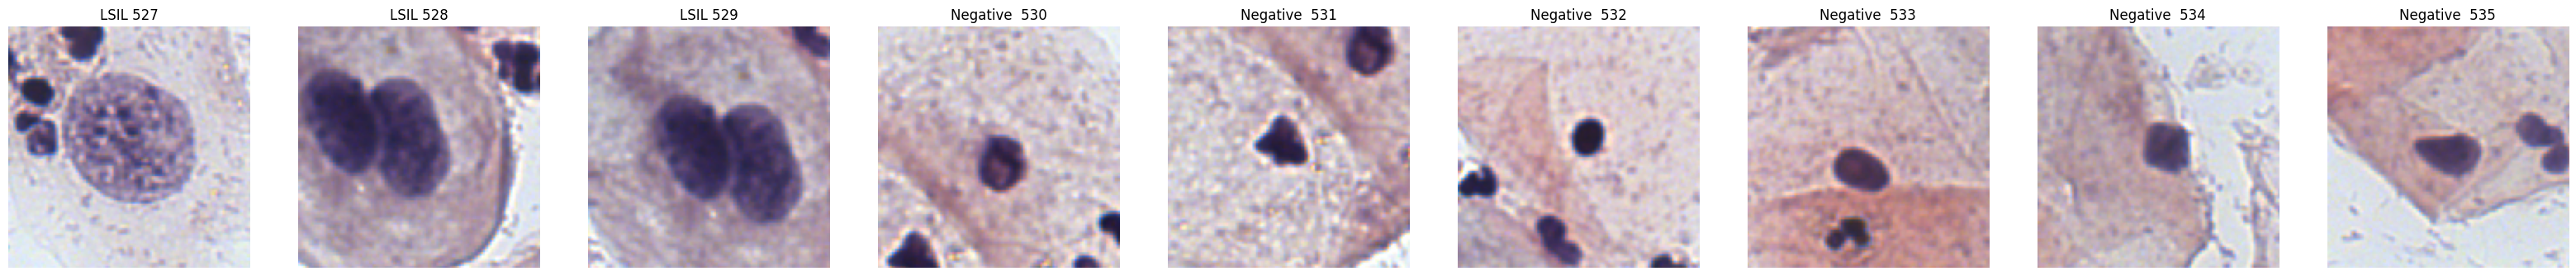

In [201]:
directory_path = '../data/base_recortada/'
images = listar_imagens(directory_path)
exibir_imagens(images)


Bibliotecas de Segmentação

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def remover_fundo_com_grabcut(imagem, x_central, y_central, tamanho_retangulo):
    mascara = np.zeros(imagem.shape[:2], np.uint8)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)
    altura, largura = imagem.shape[:2]
    
    x1 = max(0, x_central - tamanho_retangulo // 2)
    y1 = max(0, y_central - tamanho_retangulo // 2)
    x2 = min(largura, x_central + tamanho_retangulo // 2)
    y2 = min(altura, y_central + tamanho_retangulo // 2)
    
    rectangle = (x1, y1, x2 - x1, y2 - y1)
    
    cv2.grabCut(imagem, mascara, rectangle,  
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
    
    mascara_objeto = np.where((mascara == 2) | (mascara == 0), 0, 1).astype('uint8')
    
    imagem_sem_fundo = imagem * mascara_objeto[:, :, np.newaxis]
    
    img_recortada = imagem_sem_fundo[y1:y2, x1:x2]
    
    imagem_gray = cv2.cvtColor(img_recortada, cv2.COLOR_BGR2GRAY)
    
    _, mascara = cv2.threshold(imagem_gray, 10, 255, cv2.THRESH_BINARY)
    
    img_original_recortada = imagem[y1:y2, x1:x2]
    
    return img_recortada, mascara, img_original_recortada

In [8]:
def paint_quadrado_imagem_original(imagem, x_central, y_central, value_expand):
  x1 = max(0, x_central - value_expand // 2)
  y1 = max(0, y_central - value_expand // 2)
  x2 = min(imagem.shape[1], x_central + value_expand // 2)
  y2 = min(imagem.shape[0], y_central + value_expand // 2)

  imagem_com_quadrado = imagem.copy()
  cv2.rectangle(imagem_com_quadrado, (x1, y1), (x2, y2), (0, 255, 0), 2)  
  cv2.circle(imagem_com_quadrado, (x_central, y_central), 5, (0, 0, 255), -1) 

  imagem_com_quadrado_rgb = cv2.cvtColor(imagem_com_quadrado, cv2.COLOR_BGR2RGB)
  return imagem_com_quadrado_rgb

In [9]:
def generateMapSegmentad(lista_map_celula, img_name, value_expand):
  # value_expand = 70
  df = pd.read_csv("../data/classifications.csv")
  df = df[df["image_filename"] == f"{img_name}.png"]
  database = "../data/base_temporaria/"

  map_celula = {
    "title" : None,
    "img-inteira-title": None,
    "img-inteira-plotada" : None,
    "img" : None,
    "img-seg" : None,
    "img-mask" : None,
  }

  

  for i, each in enumerate(df.iterrows()):
    
    
    nome_img = each[1]['image_filename']
    nome_da_doenca = each[1]['bethesda_system']
    posi_x = each[1]['nucleus_x']
    posi_y = each[1]['nucleus_y']
    id_celular = each[1]['cell_id']  
    
    path = "".join([database, nome_img])
    
    imagem = cv2.imread(path)
    imagem_sem_fundo, mask, img_original_recortada = remover_fundo_com_grabcut(imagem, posi_x, posi_y, value_expand)
    
    map_celula["img"] = img_original_recortada
    map_celula["title"] = f"{nome_da_doenca} - {id_celular}"
    map_celula["img-inteira-title"] = nome_img
    map_celula["img-seg"] = imagem_sem_fundo
    map_celula["img-mask"] = mask
    
    if i == 0:
      imagem_original_plotada = paint_quadrado_imagem_original(imagem, posi_x, posi_y, value_expand)
    else:
      imagem_original_plotada = paint_quadrado_imagem_original(imagem_original_plotada, posi_x, posi_y, value_expand)
    
    map_celula["img-inteira-plotada"] = imagem_original_plotada
    lista_map_celula.append(map_celula.copy())
    # print(i)
    print(nome_da_doenca +  " " + str(id_celular))
  return lista_map_celula
  

In [10]:
lista_map_celula = []

lista_map_celula = generateMapSegmentad(lista_map_celula, "363b6b00d925e5c52694b8f7b678c53b", 70)

LSIL 527
LSIL 528
LSIL 529
Negative for intraepithelial lesion 530
Negative for intraepithelial lesion 531
Negative for intraepithelial lesion 532
Negative for intraepithelial lesion 533
Negative for intraepithelial lesion 534
Negative for intraepithelial lesion 535


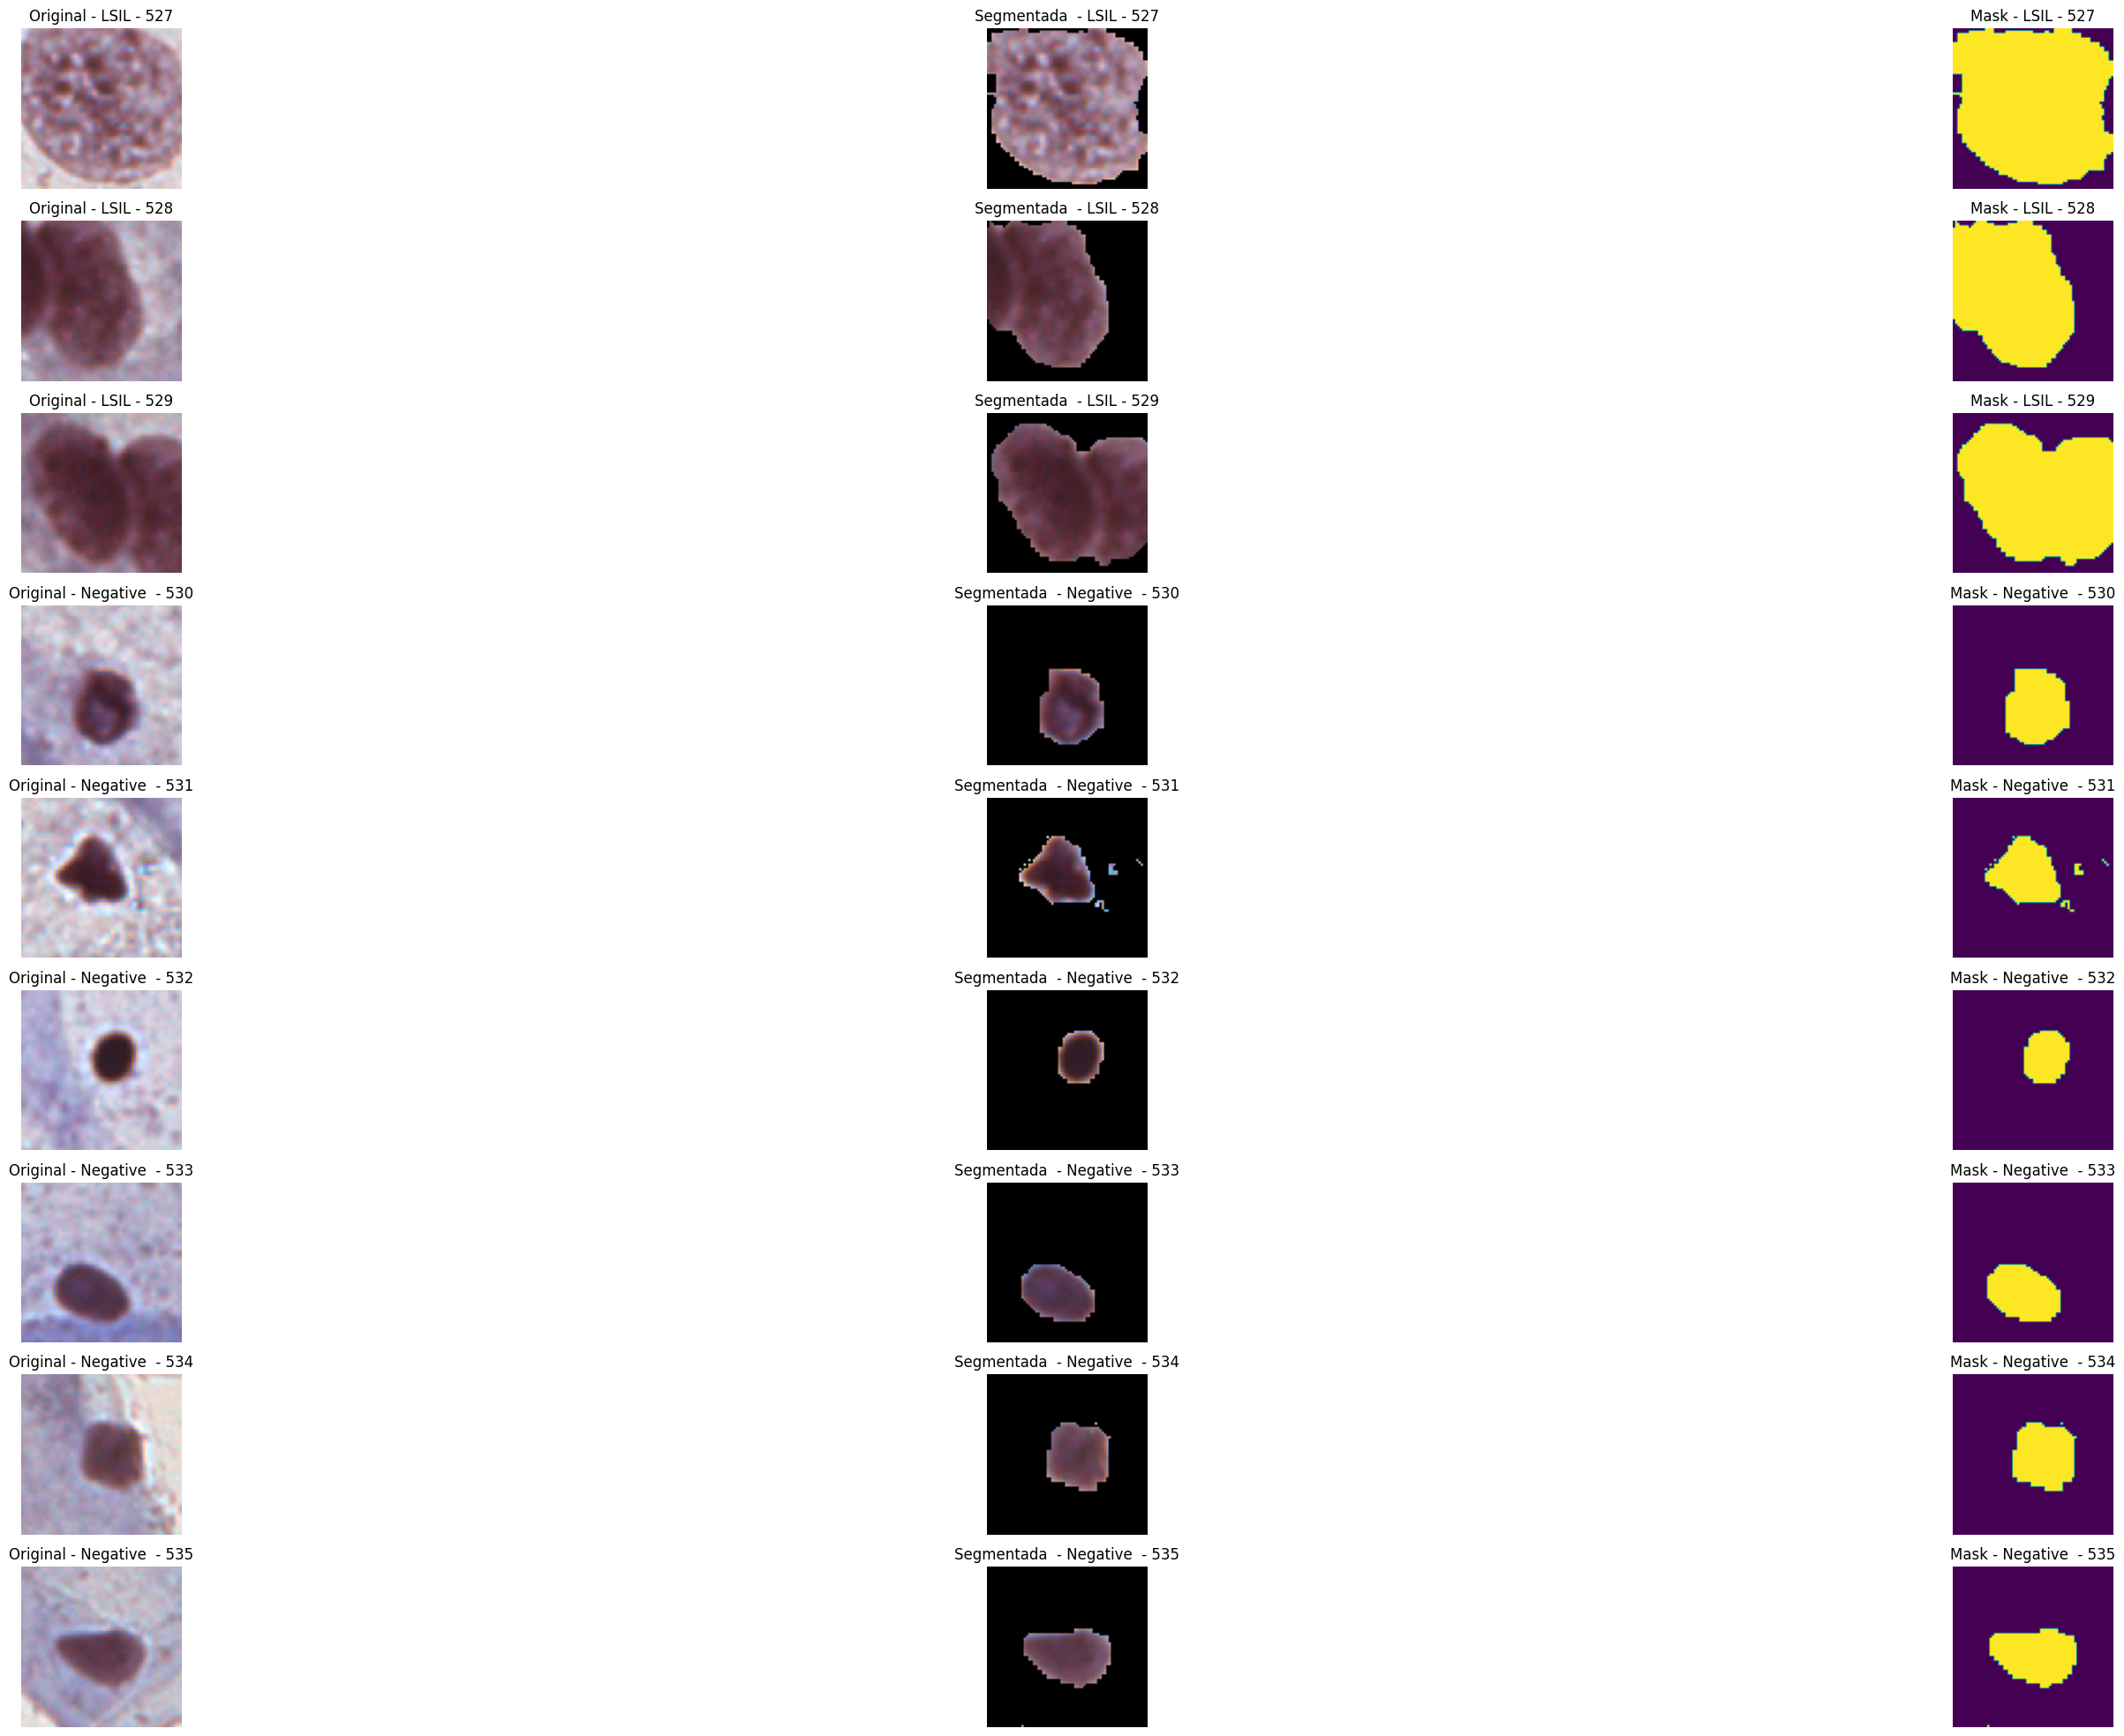

In [13]:
exibir_imagens(lista_de_caminhos=lista_map_celula, largura=40, altura=25, path=False)

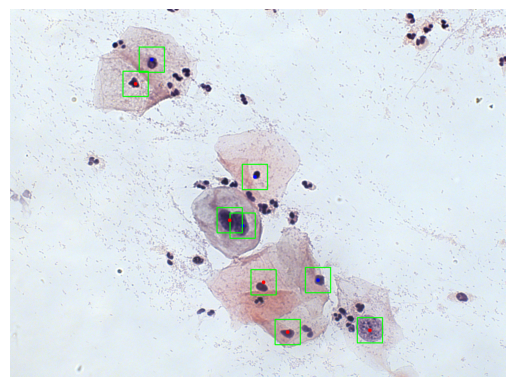

In [14]:
plt.imshow(lista_map_celula[len(lista_map_celula)-1].get("img-inteira-plotada"))
plt.axis('off')
plt.show()

In [15]:
lista_map_celula = []

lista_map_celula = generateMapSegmentad(lista_map_celula, "0a2a5a681410054941cc56f51eb8fbda", 70)

Negative for intraepithelial lesion 5636
Negative for intraepithelial lesion 5637
Negative for intraepithelial lesion 5638
Negative for intraepithelial lesion 5639
LSIL 5640


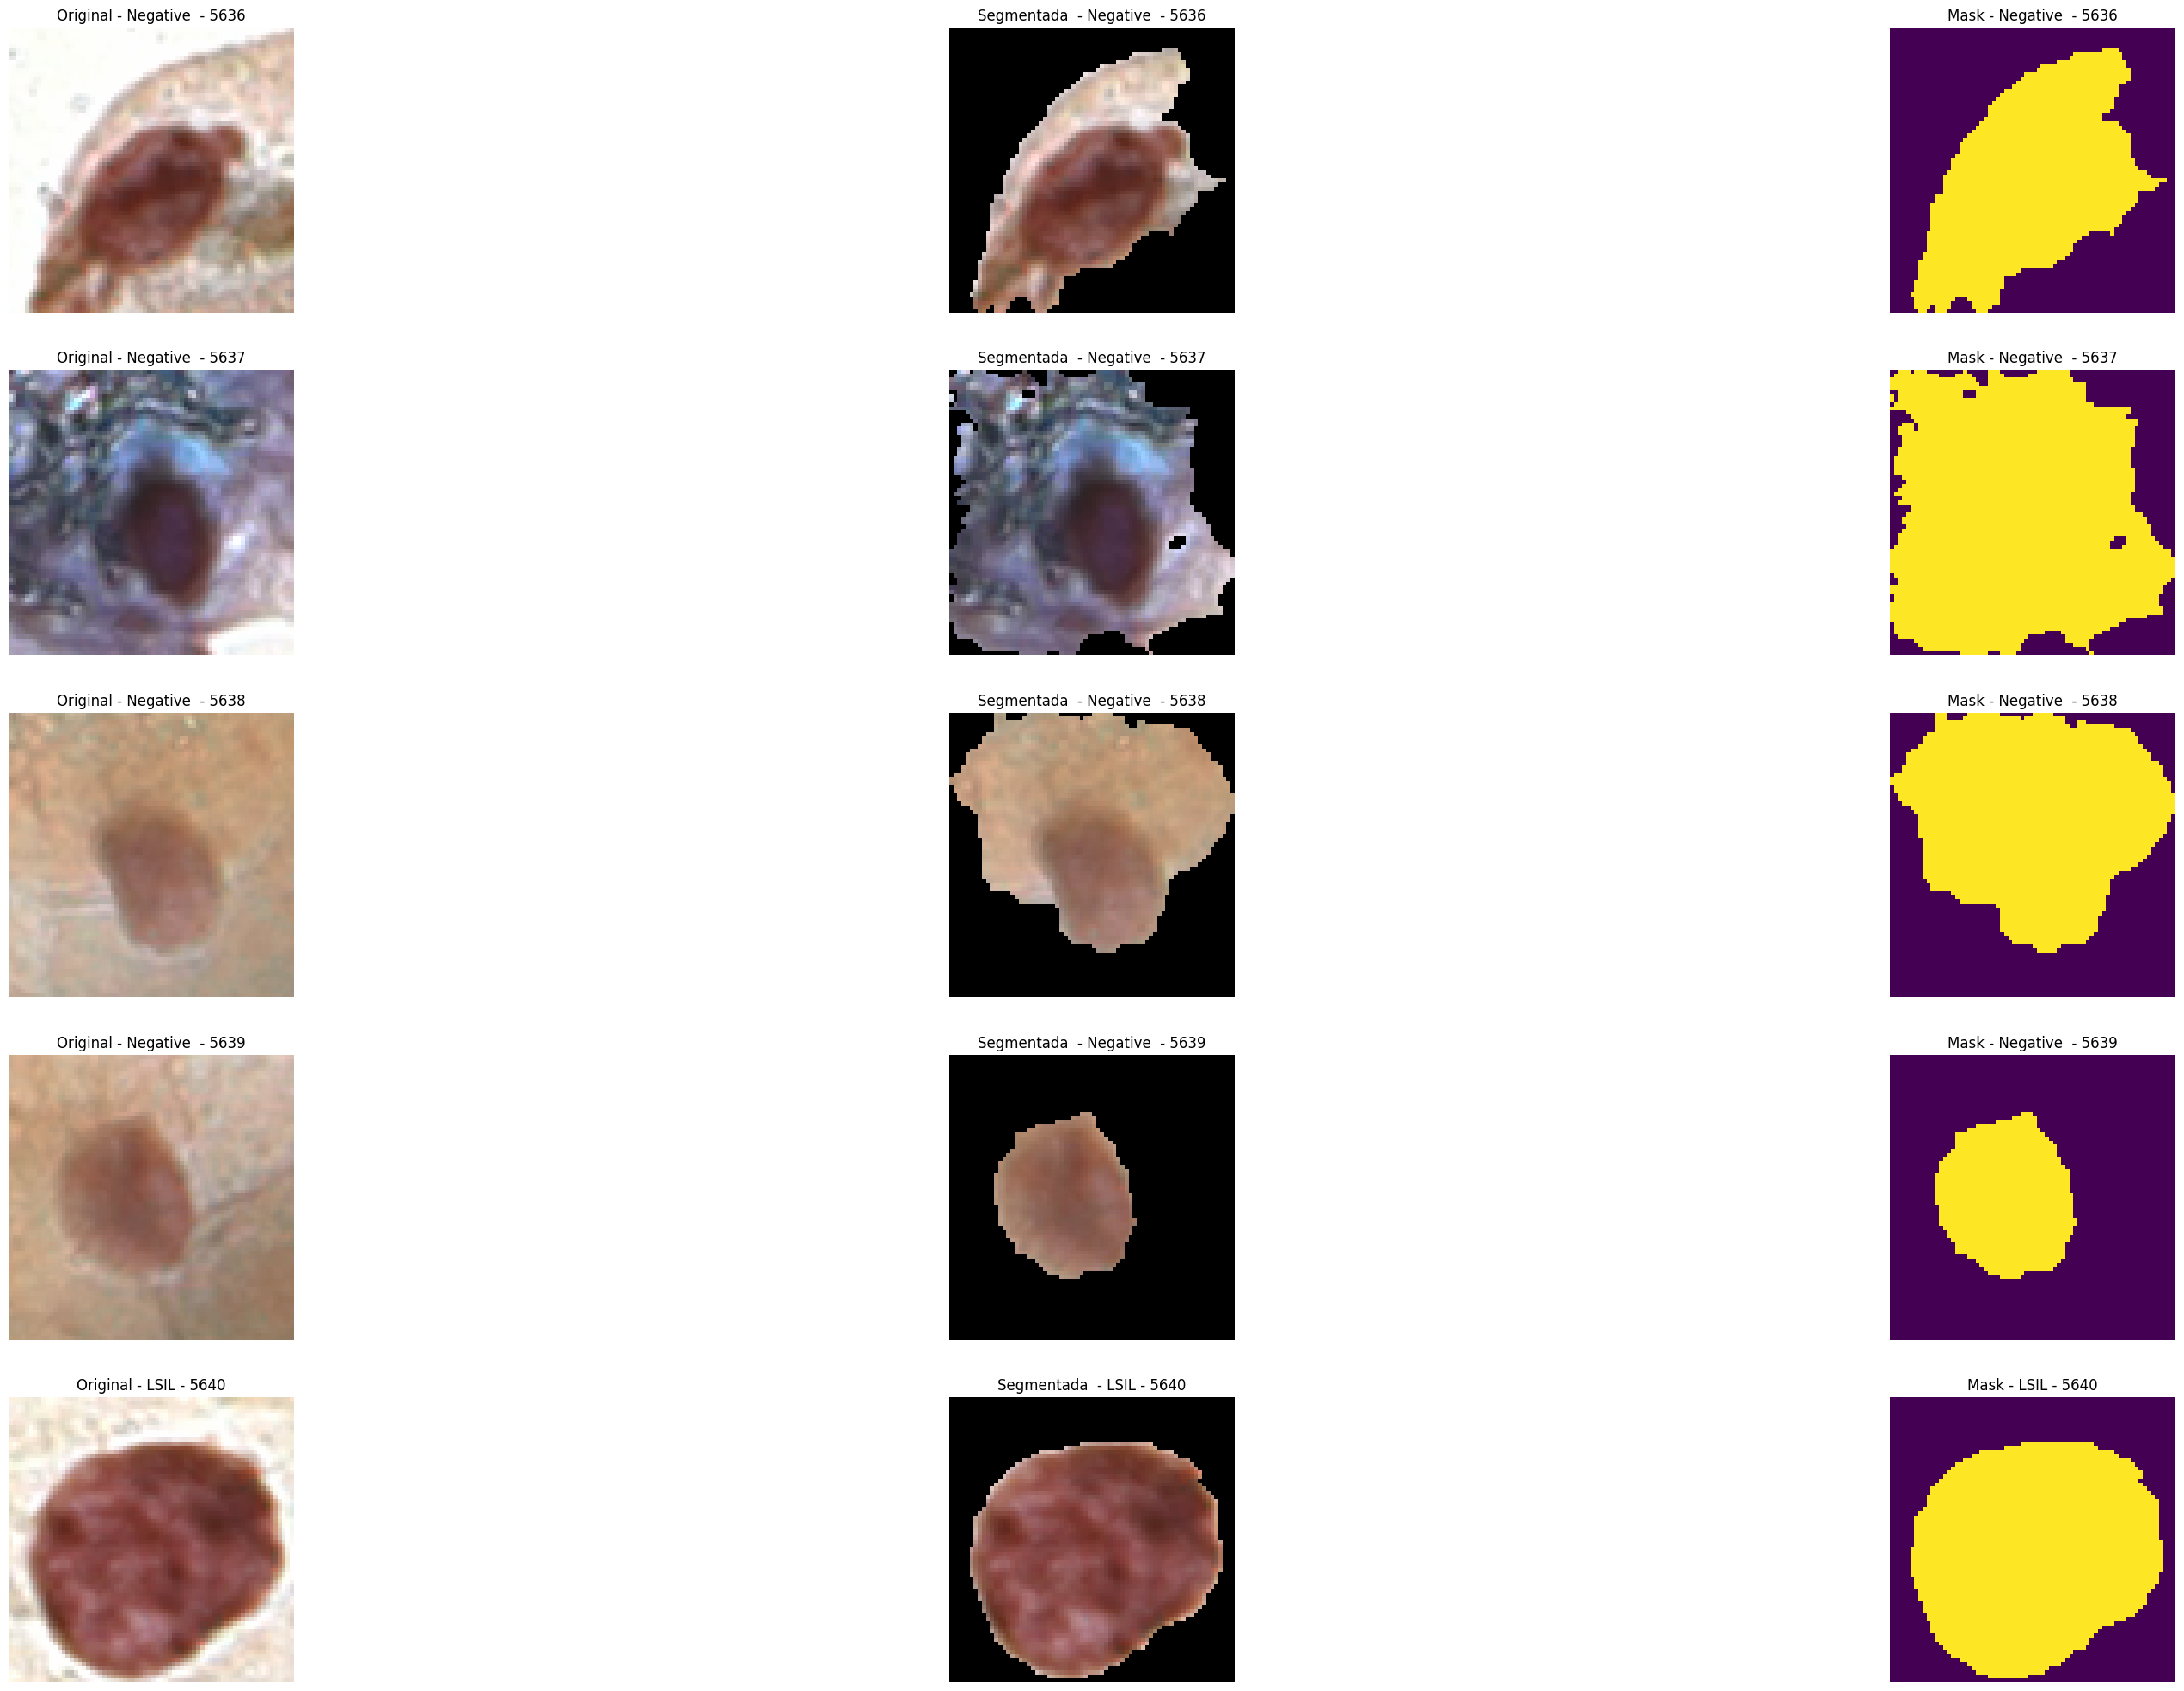

In [16]:
exibir_imagens(lista_de_caminhos=lista_map_celula, largura=40, altura=25, path=False)

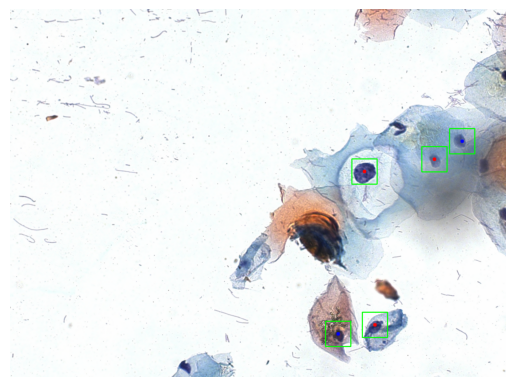

In [17]:
plt.imshow(lista_map_celula[len(lista_map_celula)-1].get("img-inteira-plotada"))
plt.axis('off')
plt.show()

In [18]:
lista_map_celula = []

lista_map_celula = generateMapSegmentad(lista_map_celula, "1c900ddde4d55e63c0d06c4854b29f89", 70)

Negative for intraepithelial lesion 5626
Negative for intraepithelial lesion 5627
Negative for intraepithelial lesion 5628
Negative for intraepithelial lesion 5629
Negative for intraepithelial lesion 5630
Negative for intraepithelial lesion 5631
Negative for intraepithelial lesion 5632
LSIL 5633
LSIL 5634
LSIL 5635


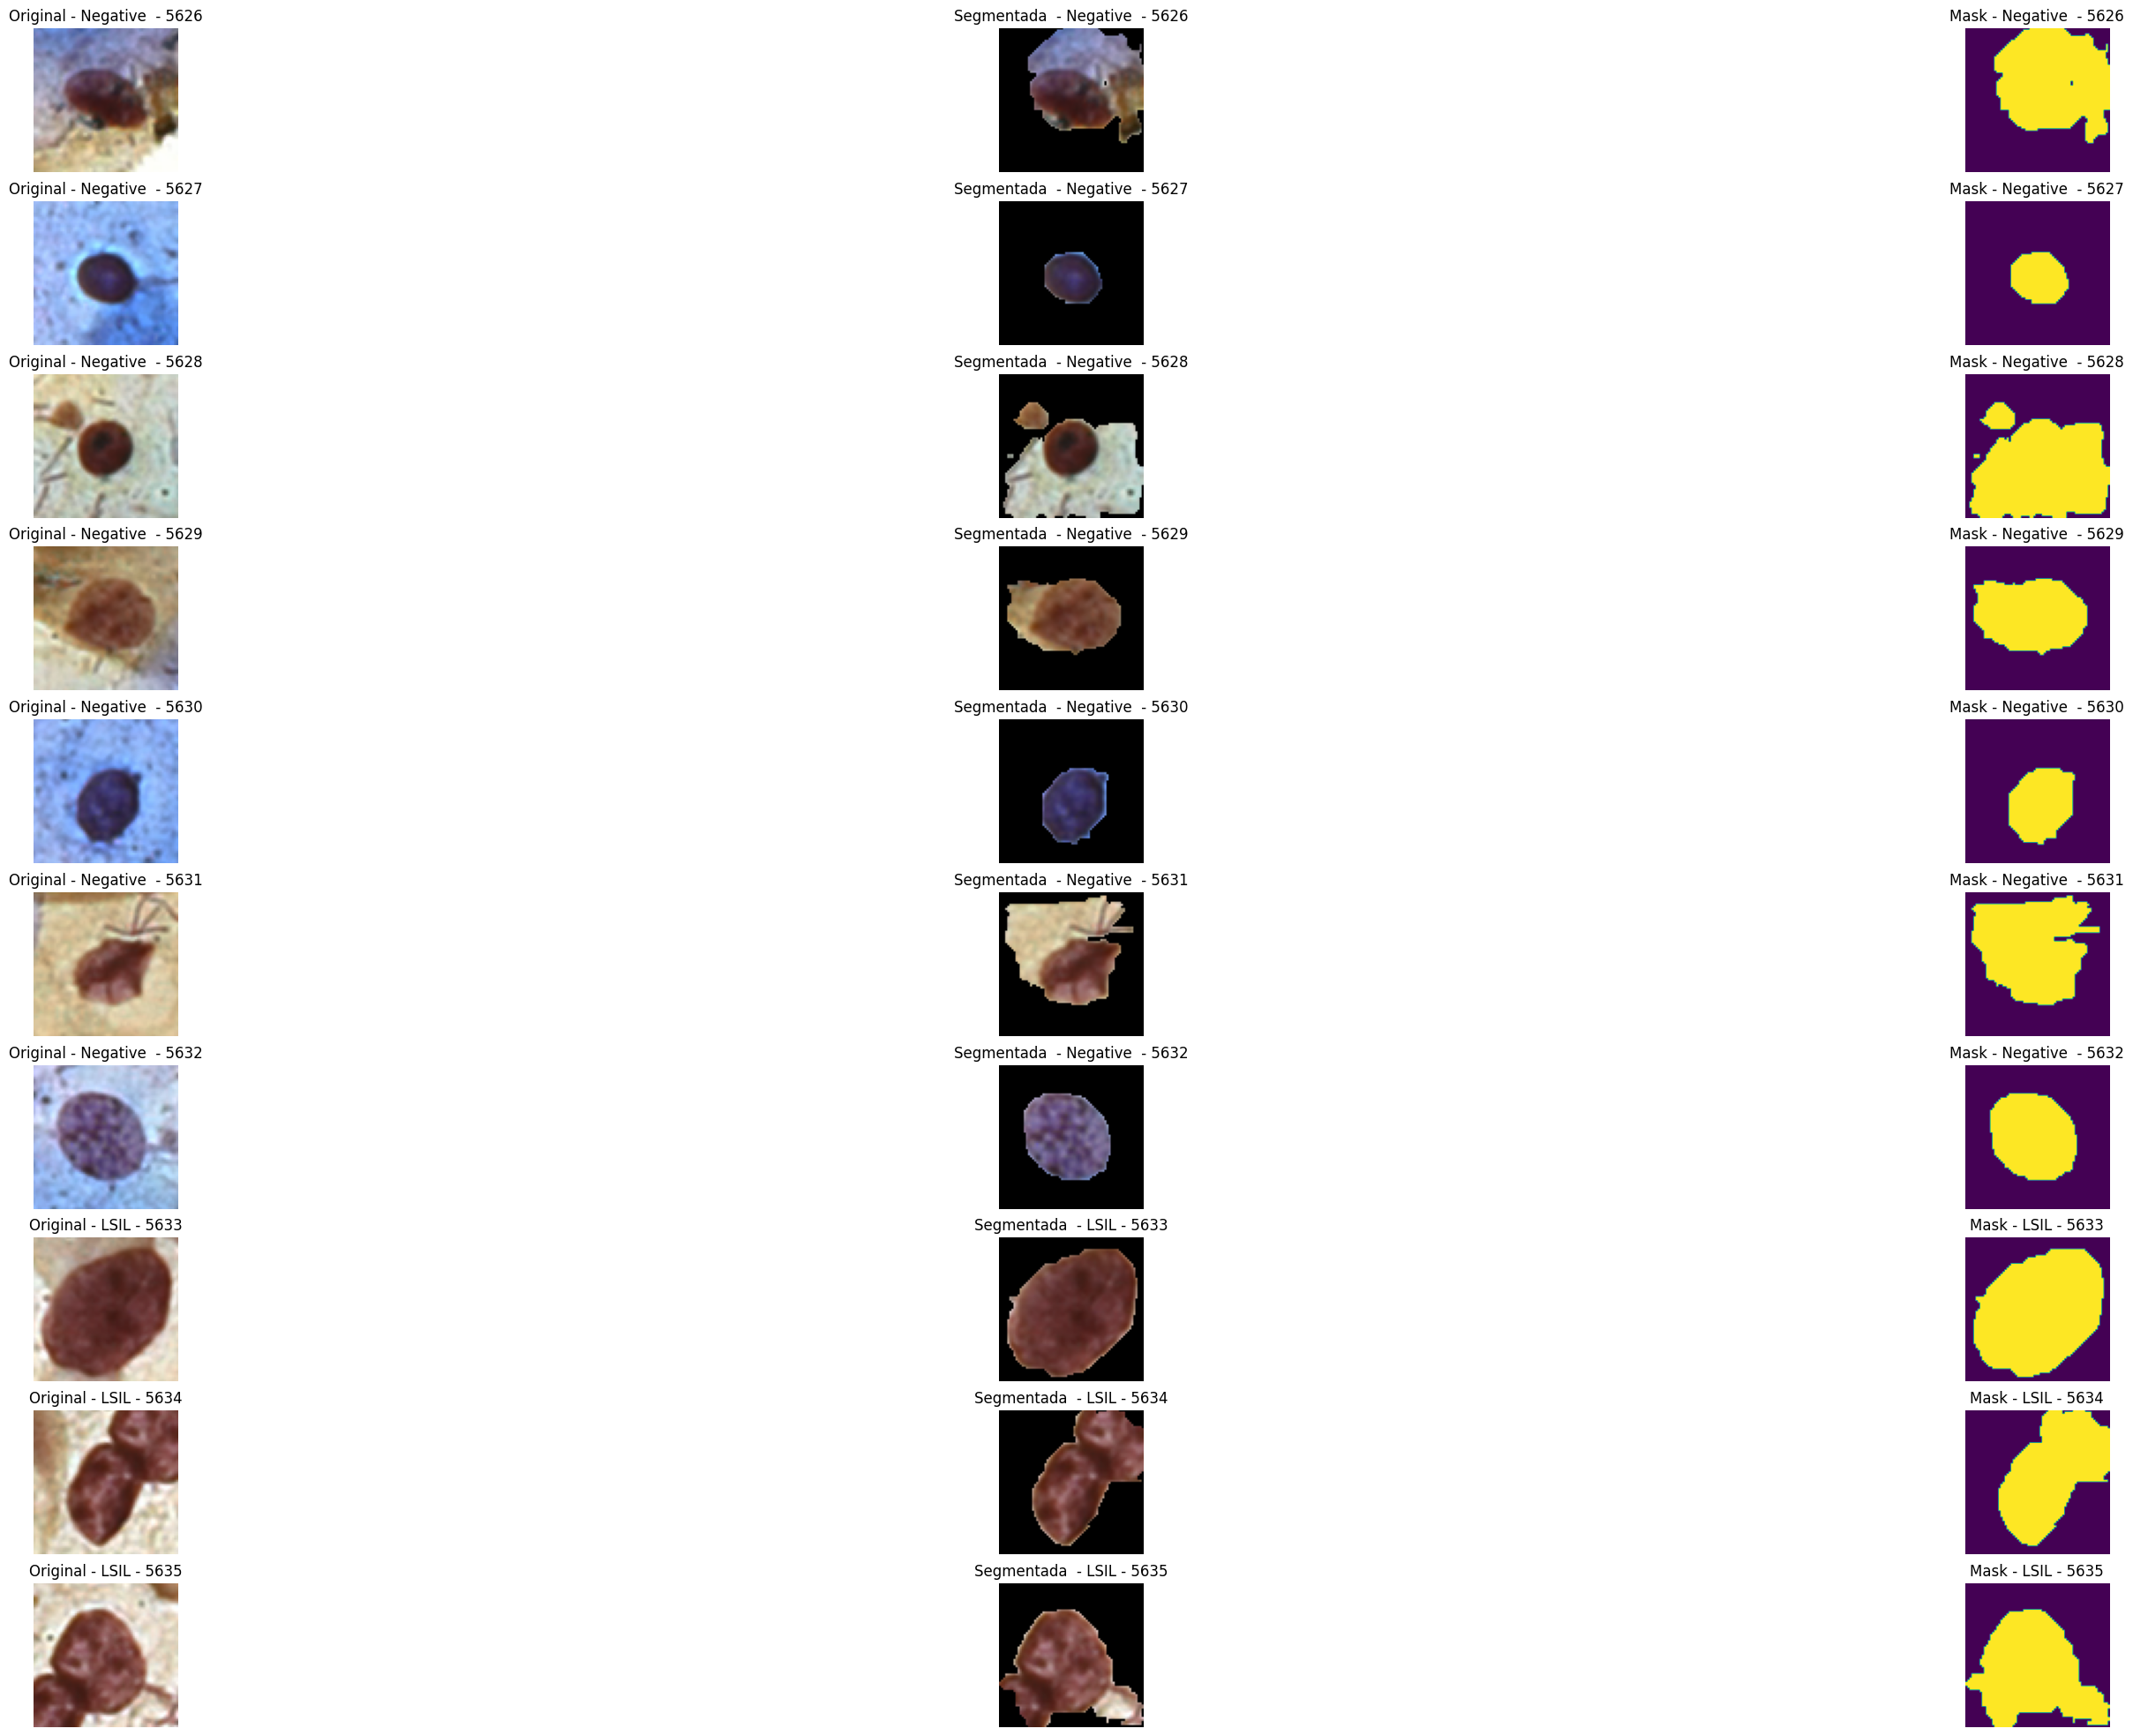

In [19]:
exibir_imagens(lista_de_caminhos=lista_map_celula, largura=40, altura=25, path=False)

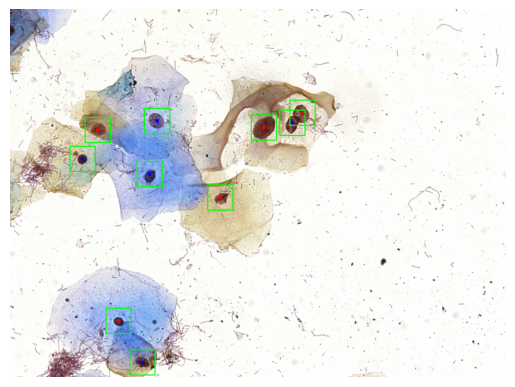

In [20]:
plt.imshow(lista_map_celula[len(lista_map_celula)-1].get("img-inteira-plotada"))
plt.axis('off')
plt.show()

Gerando Dataset de Mascaras

In [27]:
# map_celula = {
#   "title" : None,
#   "img-inteira-title": None,
#   "img-inteira-plotada" : None,
#   "img" : None,
#   "img-seg" : None,
#   "img-mask" : None,
# }

In [34]:
diretorio_dataset_recortado_mask = "../data/base_mascara/"

In [38]:
path = '../data/base_temporaria/'
img_path_list = []
for nome_arquivo in os.listdir(path):
    img_path_list.append(f"{path}{nome_arquivo}")


for each_img in img_path_list:
  lista_map_celula = []
  
  img_name = each_img.split("/")
  img_name = img_name[len(img_name)-1].replace(".png", "")

  lista_map_celula = generateMapSegmentad(lista_map_celula, img_name, 70)
  
  
  for each_map in lista_map_celula:
    
    title = each_map["title"].split("-")
    id_celular = title[len(title)-1].strip()
    nome_da_doenca = title[0].strip()
    
    if(len(each_map["img-mask"])!= 0):    

      if not os.path.exists(os.path.join(diretorio_dataset_recortado_mask, nome_da_doenca)):
        os.mkdir(os.path.join(diretorio_dataset_recortado_mask, nome_da_doenca))
    
      try:
        cv2.imwrite(f'{diretorio_dataset_recortado_mask}{nome_da_doenca}/' + f'{id_celular}.png', each_map["img-mask"])
      except:
        print(each_map["title"])
      
      
  


  
  

['../data/base_temporaria/0a2a5a681410054941cc56f51eb8fbda.png', '../data/base_temporaria/1c900ddde4d55e63c0d06c4854b29f89.png', '../data/base_temporaria/363b6b00d925e5c52694b8f7b678c53b.png']
Negative for intraepithelial lesion 5636
Negative for intraepithelial lesion 5637
Negative for intraepithelial lesion 5638
Negative for intraepithelial lesion 5639
LSIL 5640
{'title': 'Negative for intraepithelial lesion - 5636', 'img-inteira-title': '0a2a5a681410054941cc56f51eb8fbda.png', 'img-inteira-plotada': array([[[243, 249, 248],
        [247, 252, 251],
        [250, 254, 254],
        ...,
        [254, 254, 254],
        [252, 251, 254],
        [252, 253, 254]],

       [[244, 249, 248],
        [247, 252, 252],
        [250, 254, 254],
        ...,
        [254, 254, 254],
        [252, 251, 254],
        [252, 253, 254]],

       [[244, 250, 249],
        [247, 253, 252],
        [251, 254, 254],
        ...,
        [252, 251, 252],
        [251, 251, 253],
        [253, 254, 254]],